# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в программирование" </center>

# <center> Первичный анализ данных. Pandas. </center>

## Credits
[Открытый курс ODS по машинному обучению](https://github.com/Yorko/mlcourse_open) 

## Часть 1.   
  
1. Установите Anaconda (или Miniconda) и запустите Jupyter Notebook
2. Воспроизведите вычисления с семинара (файл `Explore_analysis.Pandas.ipynb`) <br>
   **Note:** Возможно, придется самостоятельно установить библиотеку seaborn. Для этого в Anaconda Prompt выполните `conda install seaborn`
3. Разберите тьюториалы [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html#min) и [Essential basic functionality](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

## Часть 2. Анализ данных по доходу населения UCI Adult

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

В качестве наблюдений в этом наборе данных представлены физические лица, они характеризуются различными признаками. Целевая переменная **salary** - доход человека > 50K или <= 50K.

In [1]:
!pip install seaborn

You should consider upgrading via the 'c:\minor\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\minor\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.neighbors import KNeighborsClassifier

# чтоб картинки рисовались в тетрадке
%matplotlib inline 

In [5]:
filename = 'adult_data.csv'
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
data = pd.read_csv(filename, names=headers, sep=',\s', na_values=["?"], engine='python')
data.head(16)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Определите размерность данных: сколько наблюдений и сколько признаков**

In [5]:
# Ваш код здесь
print('Observations: ', len(data))
print('Signs: ', len(data.columns))

Observations:  32561
Signs:  15


**Список признаков**  
**На источнике описание признаков скудное, но названия почти у всех признаков говорящие**

In [6]:
print('\n'.join(data.columns.values.tolist()))

age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
salary


**Проверьте, присутствуют ли в данных [пропущенные значения](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Сколько? В каких признаках?**  
**Удалите наблюдения с пропущенными значениями**

In [7]:
# Ваш код здесь
if data.isnull().values.any():
    sum_all_nan = data.isnull().sum().sum()  # Сколько
    arr_signs_nan = list()  # В каких признаках
    for column in data.columns:
        if data[column].isnull().values.any():
            arr_signs_nan.append(column)
    print(sum_all_nan)
    print(arr_signs_nan)
    data = data.dropna()

4262
['workclass', 'occupation', 'native-country']


In [8]:
data.head(16)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Для каждого признака определите, к какому типу он относится. При необходимости, приведите признак к определенному вами типу.**

In [9]:
# Ваш код здесь #################################################################################
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

**Для категориальных признаков выведите список категорий**

In [10]:
# Ваш код здесь ##########################################################################

### Используя функции и методы Pandas, ответьте на вопросы:

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [11]:
# Ваш код здесь
print('Male: ', len(data[data['sex'] == 'Male']))
print('Female: ', len(data[data['sex'] == 'Female']))

Male:  20380
Female:  9782


**2. Каков средний возраст (признак *age*) женщин?**

In [12]:
# Ваш код здесь
female = data[data['sex'] == 'Female']
fem_average_age = female.groupby('sex', as_index=False).age.mean()
fem_average_age

,sex,age
0,Female,36.883459


**3. Какова доля граждан Германии (признак *native-country*)?**

In [13]:
# Ваш код здесь
germ_cit = data[data['native-country'] == 'Germany']
proportion_germ_cit = (len(germ_cit) / len(data['native-country'])) * 100
proportion_germ_cit

0.4243750414428751

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

Text(0, 0.5, 'Amount')

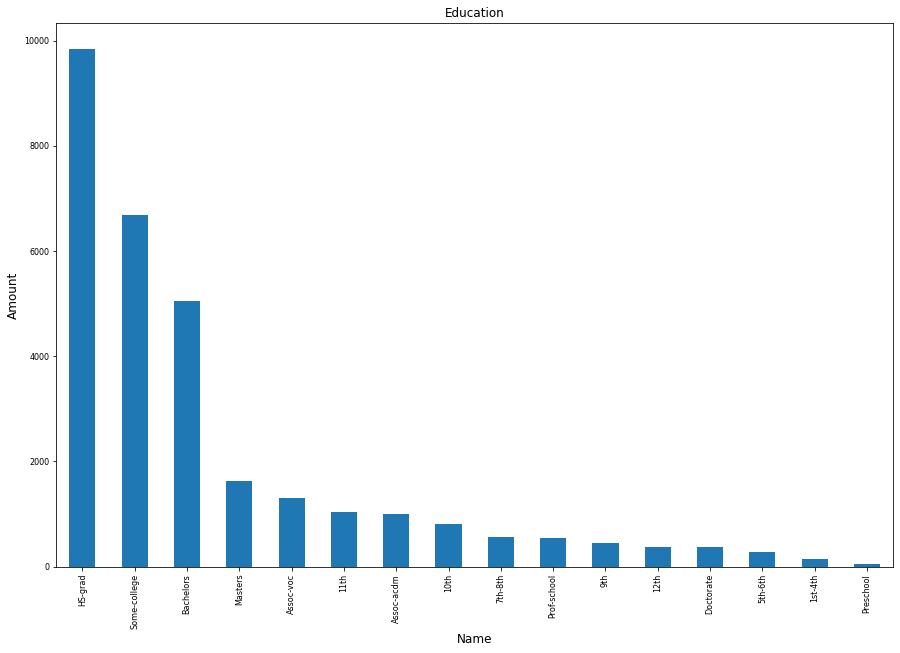

In [14]:
# Ваш код здесь
diff_values = data['education'].value_counts()
ax = diff_values.plot(kind='bar', title ='Education', figsize=(15, 10), fontsize=8)
ax.set_xlabel('Name', fontsize=12)
ax.set_ylabel('Amount', fontsize=12)

__5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак _salary_) и тех, кто получает менее 50K в год?__  
  
**Tip:** Используйте методы `groupby` и `agg`.

In [15]:
# Ваш код здесь
more = data[data['salary'] == '>50K']

more_average = more.groupby('salary').age.mean()
print('Average: \n', more_average)

more_st_dev = more["age"].std()
print('Standard Deviation: \n', more_st_dev)

Average: 
 salary
>50K    43.95911
Name: age, dtype: float64
Standard Deviation: 
 10.269632835673852


In [16]:
less = data[data['salary'] == '<=50K']

less_average = less.groupby('salary').age.mean()
print('Average: \n',less_average)

less_st_dev = less["age"].std()
print('Standard Deviation: \n', less_st_dev)

Average: 
 salary
<=50K    36.60806
Name: age, dtype: float64
Standard Deviation: 
 13.464631257161633


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**  
  
**Tip:** Нужно написать код (может хватить и одного выражения), который проверяет выполнение условия и возвращает `True` если условие выполняется (т.е. ответ на вопрос - да, правда) и `False` иначе.

In [7]:
# Ваш код здесь 

arr = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
d = data.loc[data['salary']==">50K"]["education"].isin(arr).value_counts()
if d[True] > d[False]:
    print(">50K")
else:
    print("<=50K")

>50K


<=50K    8681
>50K     6736
Name: salary, dtype: int64

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**  
  
**Tip:** Максимальный возраст мужчин расы *Amer-Indian-Eskimo* необходимо получить из таблицы, полученной в результате использования методов *groupby* и *describe*. Почитайте про [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/advanced.html).

In [88]:
# Ваш код здесь
race = data.groupby("race").describe()  #race
print("Race stat: \n", race, '\n')

sex = data.groupby("sex").describe() #gender 
print("Gender stat: \n", sex, '\n')

AIE_man = data[data['race'] == 'Amer-Indian-Eskimo'].age.max()
print("Max age:", AIE_man)

Race stat: 
                         age                                                 \
                      count       mean        std   min   25%   50%    75%   
race                                                                         
Amer-Indian-Eskimo    286.0  36.737762  11.630168  17.0  28.0  35.0  44.75   
Asian-Pac-Islander    895.0  37.910615  12.587717  17.0  28.0  36.0  46.00   
Black                2817.0  37.860845  12.418791  17.0  28.0  37.0  46.00   
Other                 231.0  33.601732  10.949163  17.0  26.0  31.0  41.00   
White               25933.0  38.580612  13.250943  17.0  28.0  37.0  47.00   

                           fnlwgt                 ... capital-loss          \
                     max    count           mean  ...          75%     max   
race                                              ...                        
Amer-Indian-Eskimo  80.0    286.0  123491.944056  ...          0.0  1980.0   
Asian-Pac-Islander  90.0    895.0  159337.400000  

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [21]:
(data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].str.startswith('Married')), 'salary'].value_counts())

SyntaxError: unexpected EOF while parsing (<ipython-input-21-8ef9bd80eb28>, line 2)

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [97]:
# Ваш код здесь
max_hours_perweek = data['hours-per-week'].max()
print("Max hours per week: ", max_hours_perweek)

people_work_alot = data[data["hours-per-week"] == max_hours_perweek].count().max()
print("People, who works maximum hours per week: ", people_work_alot)

mh_ms = (data[data["hours-per-week"] == max_hours_perweek]["salary"]==">50K").value_counts()
perce = ((mh_ms[True]) / people_work_alot) * 100
print("Percentage: ", perce)

Max hours per week:  99
People, who works maximum hours per week:  78
Percentage:  32.05128205128205


**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**  
  
**Tip:** Необходимо построить `barplot` для каждой страны с разбивкой по признаку *salary*. Используйте [crosstab](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html).  
Пример графика: ![](task_10_example.png)

Text(0, 0.5, 'Amount')

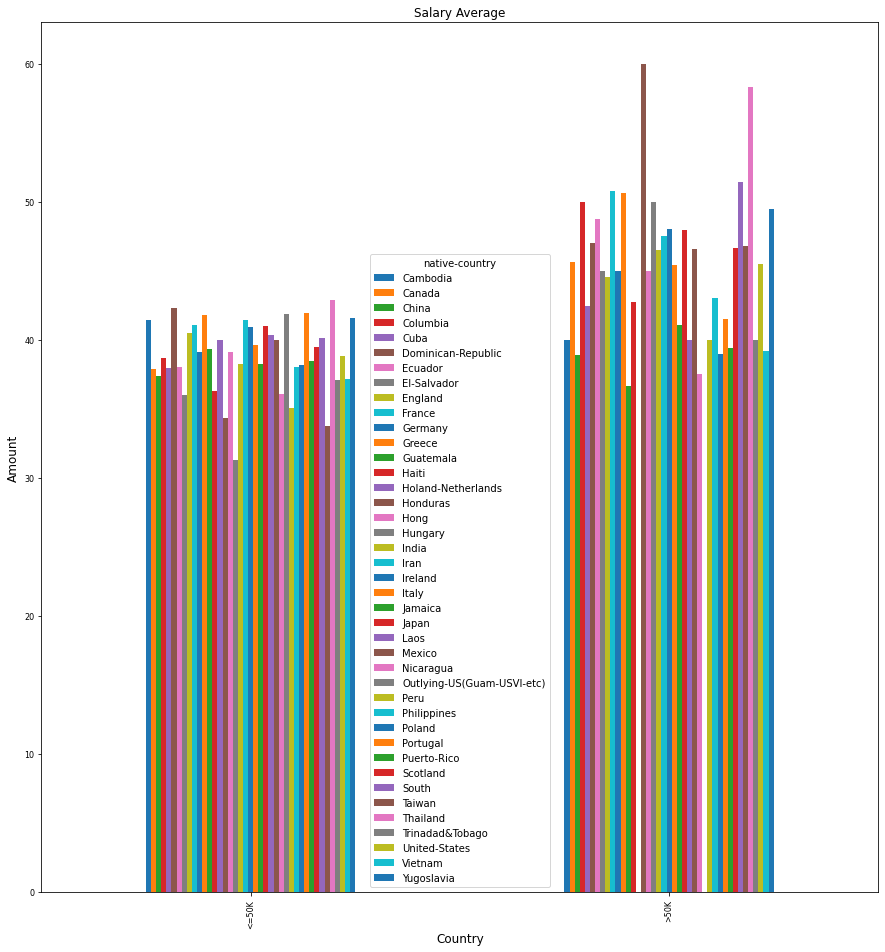

In [23]:
# Ваш код здесь
last = pd.crosstab(data['native-country'], data['salary'], 
           values=data['hours-per-week'], aggfunc=np.mean).T

ax = last.plot(kind='bar', title ='Salary Average', figsize=(15, 16), fontsize=8, legend=True)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Amount', fontsize=12)


In [24]:
last

native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5
